In [2]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')

In [3]:
import pandas as pd

In [4]:
def find(tag,selector):
    try:
        return tag.find_element_by_css_selector(selector).text
    except:
        return ""

In [36]:
df_paras = pd.DataFrame()
num = 0
while(1):
    url='https://in.linkedin.com/jobs/data-science-jobs-bengaluru-ka?location=Bengaluru%2C%20KA&pageNum=2&locationId=PLACES.in.16-0&keywords=data%20science&position=1&count=25&start='+str(num)
    browser.get(url)
    parent_tag = browser.find_element_by_css_selector('div.jobs-search-content__results-scrollable')
    childtags = parent_tag.find_elements_by_css_selector('div.listed-job-posting__content')

    for tag in childtags:
        cur_row = {
            "Designation " : find(tag,'h3.listed-job-posting__title'),
            "Company name": find(tag,'h4.listed-job-posting__company'),
            "Location": find(tag,'p.listed-job-posting__location'),
            "Date Posted": find(tag,'span.posted-time-ago__text'),
            "Job Description" : find(tag,'p.listed-job-posting__description')
        }
        df_paras = df_paras.append(cur_row, ignore_index=True)
    try:
        if num < 99:
            num =num + 25
        else:
            break;
    except:
        break;

df_paras.head()

,Company name,Date Posted,Designation,Job Description,Location
0,Amazon,2 hours ago,Senior Data Scientist,"If you have experience with AI, including buil...",Bengaluru
1,Gambit Sports,2 weeks ago,Data Scientist,We are looking for a data scientist who will b...,Anekal
2,"Group 42, Inc.",1 month ago,Data Science Engineer,2+ years' experience in AI and ML algorithm de...,Bengaluru
3,IBM India Private Limited,5 days ago,Data Science Specialist,Required Technical and Professional Expertise ...,Bengaluru
4,Accenture in India,1 day ago,Data Science Specialist,This role will be based in Bangalore.We are lo...,Bengaluru


In [37]:
len(df_paras)

125

# Create a word cloud using job description 

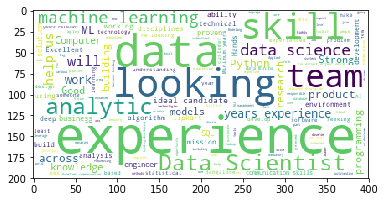

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc =WordCloud(background_color='white').generate(' '.join([tag for tag in df_paras['Job Description']]))
plt.imshow(wc)

# Identify company wise no. of jobs posted and identify top 5 companies

In [39]:
companies = df_paras.groupby('Company name').size().reset_index()
companies.head()

,Company name,0
0,3D-IP Semiconductors,1
1,ABB,1
2,AIG,1
3,Accenture,2
4,Accenture in India,1


In [40]:
df_paras.groupby('Company name').size().nlargest(5).reset_index()

,Company name,0
0,Walmart Labs India,5
1,Allstate India,4
2,Amazon,3
3,FICO,3
4,Flipkart,3


# Identify location wise no. of jobs posted and identify top 3 location

In [41]:
location = df_paras.groupby('Location').size().reset_index()
location.head()

,Location,0
0,"365, 3rd Floor, Sulochana Building 1st Cross R...",1
1,"AKR Tech Park 7th Mile, Krishna Reddy Industri...",1
2,Anekal,8
3,Bengaluru,109
4,"Global INcubation SERVices (GINSERV), JSS Inst...",1


In [42]:
df_paras.groupby('Location').size().nlargest(3).reset_index()

,Location,0
0,Bengaluru,109
1,Anekal,8
2,"SJR Towers, 27, Bannerghatta Main Rd, JP Nagar...",2
